# Project: TMDb Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

#### In this project, we will be analyzing the data associated with the TMDb Movie Dataset. The Movie Database (TMDb) provided this data collection with details on 10,000 films, including user ratings and revenues.

> A pipe (|) symbol is used to denote a space between values in some columns, such as "cast" and "genres."
> The "cast" column has some peculiar characters. Not cleaning them should not be a concern. Keep them just as they are.
> The final two columns that end in "_adj" display the associated movie's budget and revenue in 2010 dollars, taking inflation into account.

### Research Questions
###### Research Question 1
> What is the Correlation Between The Variables. <br/>
###### Research Question 2
> What is the Movie with the Highest Runtime. <br/>
###### Research Question 3
> Which Director produced the most popular Movies. <br/>


In [1]:
# Import all the packages required for the Analysis
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Load and Display the Dataset

In [2]:
df = pd.read_csv("tmdb-movies.csv")
df.head(3)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


### General Properties of Each Column in the Dataset

> #### id - It is a unique identifier for each movie in the Dataset
> #### imdb_id - It is am TMDb unique identifier for each movie.
> #### popularity - It is in percentage and indicates a measure of how popular a movie is
> #### budget - It refers to an estimation of revenue and expenses for a movie in this context.
> #### revenue - It indicates the total amount that has been realized..
> #### original_title - It indicates the unique title for each movie.
> #### cast - It entails the actors for each movie in the dataset.
> #### homepage - It indicates the url for each movie
> #### Director - They oversee all aspect of a movie production 
> #### tagline - It is a tagline for advertizing a movie.
> #### overview -  It details the synopsis of the movie.
> #### runtime - It details the length of a movie in minutes
> #### genres - It is the theme category of a movie.
> #### production_companies - It refers to companies that produced the movie
> #### release_date - The release date of the movie. - Change to Date Time
> #### vote_count - The total votes by registereed TMDb users on a scale of 1-10 for a particular movie
> #### vote_average - The average of the votes on a scale of 1-10 by registereed TMDb users for a particular movies
> #### release_year - The year the movie was released
> #### budget_adj -  movie's budget  in 2010 dollars, taking inflation into account.
> #### revenue_adj - movie's revenue in 2010 dollars, taking inflation into account.

In [3]:
df.shape

(10866, 21)

In [4]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [6]:
df.director.nunique()

5067

In [7]:
df.director.isnull().sum()

44

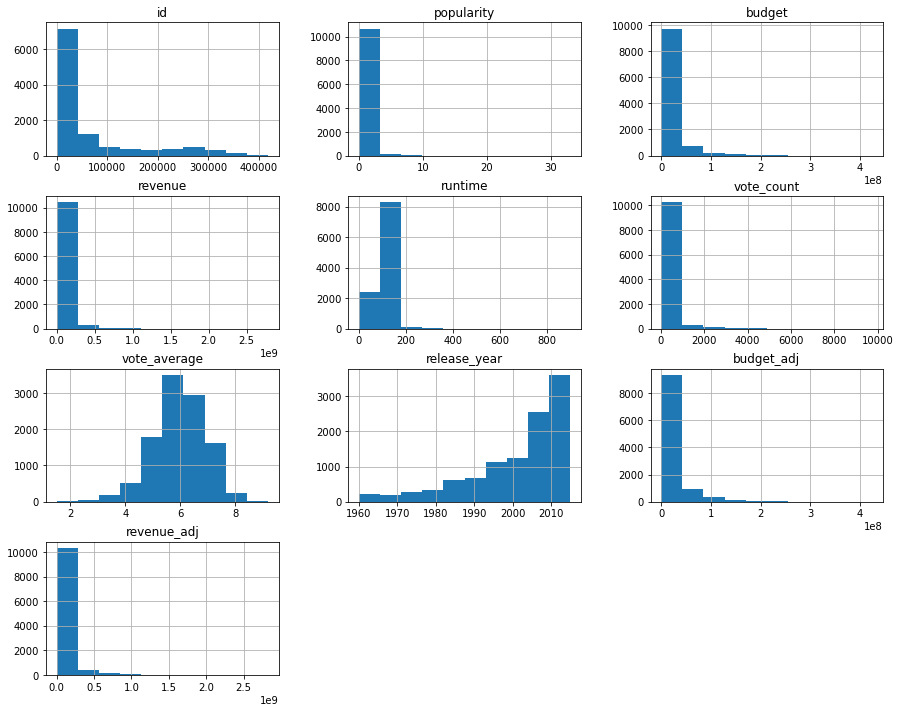

In [8]:
df.hist(figsize=(15,12));

### Data Cleaning (Replace this with more specific notes!)

##### Check for Duplicates in Our Dataset and Drop Them

In [9]:
df.duplicated().sum()

1

In [10]:
df.drop_duplicates(inplace = True)

In [11]:
df.duplicated().sum()

0

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   imdb_id               10855 non-null  object 
 2   popularity            10865 non-null  float64
 3   budget                10865 non-null  int64  
 4   revenue               10865 non-null  int64  
 5   original_title        10865 non-null  object 
 6   cast                  10789 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10821 non-null  object 
 9   tagline               8041 non-null   object 
 10  keywords              9372 non-null   object 
 11  overview              10861 non-null  object 
 12  runtime               10865 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9835 non-null   object 
 15  release_date       

##### Drop The Columns That Are Not Required For My Analysis

In [13]:
df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview'], axis = 1, inplace = True)
df.head()

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


##### Remove rows with null fields

In [14]:
df.isnull().sum()

id                         0
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [60]:
[] = df.columns
def drop_null_values(x):
    j = x.astype(str)
    df.dropna(subset = [j], inplace = True)

In [61]:
#df.dropna(subset = ['cast'], inplace = True)
drop_null_values(cast)

NameError: name 'cast' is not defined

In [36]:
#df.dropna(subset = ['director'], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10865 non-null  int64  
 1   popularity            10865 non-null  float64
 2   budget                10865 non-null  int64  
 3   revenue               10865 non-null  int64  
 4   original_title        10865 non-null  object 
 5   cast                  10789 non-null  object 
 6   director              10821 non-null  object 
 7   runtime               10865 non-null  int64  
 8   genres                10842 non-null  object 
 9   production_companies  9835 non-null   object 
 10  release_date          10865 non-null  object 
 11  vote_count            10865 non-null  int64  
 12  vote_average          10865 non-null  float64
 13  release_year          10865 non-null  int64  
 14  budget_adj            10865 non-null  float64
 15  revenue_adj        

In [ ]:
df.dropna(subset = ['genres'], inplace = True)

In [ ]:
df.dropna(subset = ['production_companies'], inplace = True)

In [ ]:
df.isnull().sum()

In [ ]:
df.shape

In [ ]:
df.head(10)

##### Change the Datatype of release_date from string to datetime

In [ ]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [ ]:
df.info()

In [ ]:
df.head(6)

In [ ]:
df.hist(figsize=(15,12));

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: What is the Correlation Between the Attributes

In [ ]:
f, ax = plt.subplots(figsize = (15,12))
df_corr = df.corr()
sns.heatmap(df_corr, annot = True)

Significant Correlation exists between between some variables. This further gave me an insight on the variables to select to perform my analysis.

### Research Question 2: Which Movie Has the Highest Runtime?

In [ ]:
#fetching and combining different columns
movies_and_runtime = df[["original_title", "runtime"]]
movies_and_director = df[["original_title", "director"]]
movies_and_revenue = df[["original_title", "revenue_adj"]]
popularity_vote_count = df[["popularity", "vote_count"]]
popularity_and_director = df[["popularity", "director"]]

sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.3)


ax = sns.barplot(
    movies_and_runtime.sort_values(by = "runtime", ascending=False).head(10).original_title, 
    movies_and_runtime.sort_values(by = "runtime", ascending=False).head(10).runtime)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Movie Titles', ylabel='Movie Runtime', title = 'Top 10 Movies Based On Their Runtime')
plt.show()

The Movie TItled Taken has the Highest  runtime in minutes.

## Research Question 3: Which Director Produced the Most Popular Movies

In [ ]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale=1.3)


ax = sns.barplot(
    popularity_and_director.sort_values(by = "popularity", ascending=False).head(10).popularity, 
    popularity_and_director.sort_values(by = "popularity", ascending=False).head(10).director)

#rotate x-axis' text
for item in ax.get_xticklabels():
    item.set_rotation(85)

ax.set(xlabel='Movie Titles', ylabel='Movie Directors Name', title = 'Top 10 Most Directors with the Most Popular Directors')
plt.show()

Colin Trevorrow is the Director that produced the movies that are most popular in our Movie Database.

<a id='conclusions'></a>
## Conclusions

The TMDb Dataset is quite an interesting one. I analyzed the Dataset to visualize the correlation between the variables to gain insight into which of the variables to select to perform my analysis with significant correlation existing between some of them.
Overall, I was able to find answers to research questions including; The Correlation between my Attributes; The Movie with the Highest Runtime produced from 1960 to 2015; The Director that Produced the Most Popular Movies from 1960 to 2015.


## Limitations

Some of the challenges I encountered in the Dataset include the  presence of null values, Duplicated Rows and also cells of some columns that contained multiple values.
To Tackle these challenges, I dropped some of the rows that contained null values, and dropped columns like imdb_id that had null values, Since it could not function as a unique identifier.
Further insight could be achieved if Machine Lerning was being adopted probably by a Data Scientist, for instance, if a particular director is more likely to direct some movies with some specific cast.